In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Income.csv")
dataset.head(3)

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580


In [3]:
dataset.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [4]:
dataset.isnull().sum()

age           0
experience    0
income        0
dtype: int64

<Axes: xlabel='experience'>

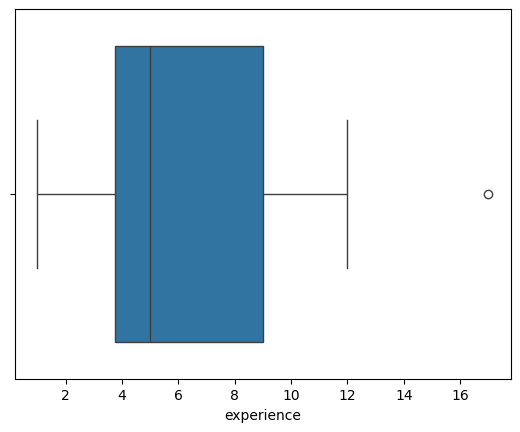

In [5]:
sns.boxplot(x="experience", data=dataset)

In [ ]:
mean = dataset["experience"].mean()
SD = dataset["experience"].std()
max_range = mean+3*SD
dataset = dataset[(dataset["experience"]<=max_range)]

<Axes: xlabel='experience'>

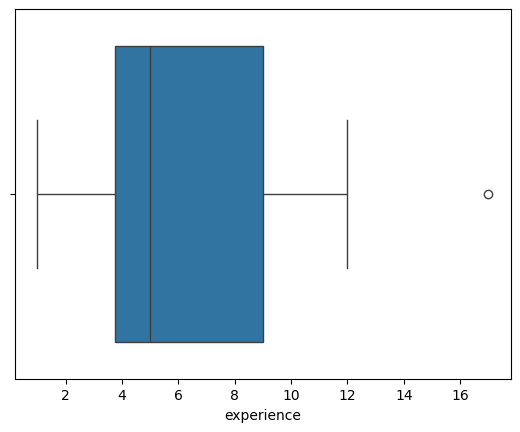

In [8]:
sns.boxplot(x="experience", data=dataset)

In [10]:
def multilinear_regression_range(x, y, test_size=None, random_state=50):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    model = LinearRegression()
    max_rand_state = 0
    max_score = 0
    for rand_state in range(random_state-50, random_state+50):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state=rand_state)
        model.fit(x_train, y_train)
        if model.score(x_test, y_test) > max_score:
            max_rand_state = rand_state
            max_score = model.score(x_test, y_test)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state=max_rand_state)
    model.fit(x_train, y_train)
    print(f"Model Accuracy: {model.score(x_test, y_test)*100:.3f}%")
    print(f"Random state set : {max_rand_state}")
    return model, x_test, y_test

In [12]:
x = dataset.iloc[:, :-1]
y = dataset["income"]

In [15]:
lr, x_test, y_test = multilinear_regression_range(x, y, test_size=0.2, random_state=100)
lr

Model Accuracy: 99.699%
Random state set : 80


LinearRegression()

In [16]:
lr.score(x_test, y_test)

0.9969867729106353

In [19]:
lr.predict([[47, 2]])

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30948.99484025])